On va considérer un jeu de données tabulaire contenant des logiciels dont certains sont des malwares.

Après avoir mené une analyse exploratoire des données, on créera un classifieur et mettant en oeuvre les démarches classiques de ML
(preprocessing, Crossvalidation, optimisation d'hyperparamètres, features importance).

+ Proposer une analyse exploratoire de données (ACP, clustering etc)
+ Entraîner 3 modèles : Regression Lasso (GridSearch), XGBoost (utiliser les valeurs SHAP pour comprendre les features importantes), un réseau fully-connect (utiliser tous les outils classiques d'optimisation d'entrainements, Neptuna)
+ Comparer les trois modèles !

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('file_pe_headers.csv')

In [3]:
df

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,clip.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,85,0,0,24948,28672,0,0
19607,VNC-Server-6.2.0-Windows.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,10,391,0,0,1413420,1462272,0,18855424
19608,Microsoft.GroupPolicy.Management.ni.dll,23117,0,0,0,0,0,0,0,0,...,3758096448,0,0,0,0,0,0,61440,0,0
19609,cryptuiwizard.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,12,162,8,89008,94904,102400,0,0


In [4]:
df.dtypes

Name                            object
e_magic                          int64
e_cblp                           int64
e_cp                             int64
e_crlc                           int64
                                 ...  
ImageDirectoryEntryExport        int64
ImageDirectoryEntryImport        int64
ImageDirectoryEntryResource      int64
ImageDirectoryEntryException     int64
ImageDirectoryEntrySecurity      int64
Length: 79, dtype: object

In [5]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Name[object],1. VirusShare_a878ba26000edaac5c92. VirusShare_e04dca7e542cad261c73. VirusShare_52b59b899fca8528f984. VirusShare_efd01dea30b400b9dee5. VirusShare_10e2d0328f5435127f76. VirusShare_ef90900f1d4fa4d4ab17. VirusShare_a670e3e8d2bf6952e6e8. VirusShare_1aa8d15d58f3ad637b89. VirusShare_17ad2c7a9dec2ae479110. VirusShare_8775f56937513105aae11. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)19,601 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,e_magic[int64],1. 23117,"19,611 (100.0%)",,0(0.0%)
3,e_cblp[int64],Mean (sd) : 178.6 (987.2)min < med < max:0.0 < 144.0 < 59448.0IQR (CV) : 0.0 (0.2),39 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaUlEQVR4nO3XT2oCMRiH4aSI6GYGETyMh+hhewhvIyUuqi1Iuuum1D/jov3R59km+cjiZYbU3nuBv+7pty8At5hd21BrXZZS5hPnf/TejxPPwpeLodZal+v1+nkYhtWU4YfD4bXW+iJWHnXtizofhmG13W6P4zie7hncWlvsdrvVfr+fl1KEykOu/vpLKWUcx9Nms3mbMH854Qx84zFFBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEmN2yqbW2uHdwa21xPp9npZSh1nr3xfh33nvvp58WPwF79y3yrjldnwAAAABJRU5ErkJggg=="">",0(0.0%)
4,e_cp[int64],Mean (sd) : 71.7 (1445.2)min < med < max:0.0 < 3.0 < 63200.0IQR (CV) : 0.0 (0.0),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaUlEQVR4nO3XT2oCMRiH4aSI6GYGETyMh+hhewhvIyUuqi1Iuuum1D/jov3R59km+cjiZYbU3nuBv+7pty8At5hd21BrXZZS5hPnf/TejxPPwpeLodZal+v1+nkYhtWU4YfD4bXW+iJWHnXtizofhmG13W6P4zie7hncWlvsdrvVfr+fl1KEykOu/vpLKWUcx9Nms3mbMH854Qx84zFFBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEmN2yqbW2uHdwa21xPp9npZSh1nr3xfh33nvvp58WPwF79y3yrjldnwAAAABJRU5ErkJggg=="">",0(0.0%)
5,e_crlc[int64],Mean (sd) : 49.1 (1212.2)min < med < max:0.0 < 0.0 < 64613.0IQR (CV) : 0.0 (0.0),26 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaUlEQVR4nO3XT2oCMRiH4aSI6GYGETyMh+hhewhvIyUuqi1Iuuum1D/jov3R59km+cjiZYbU3nuBv+7pty8At

In [6]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html()

/home/max/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:04 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Je vous laisserai mener votre propre Analyse Exploratoire de Données et m'en proposer une !

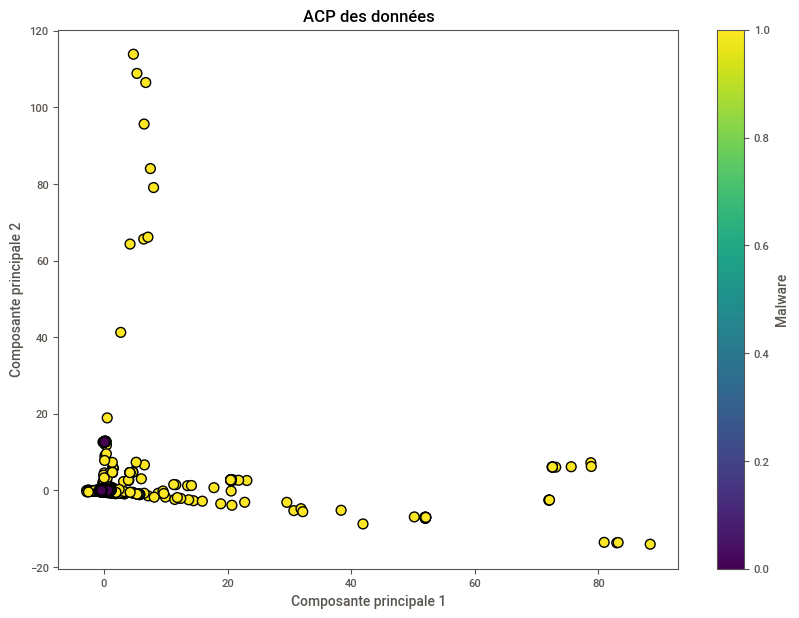

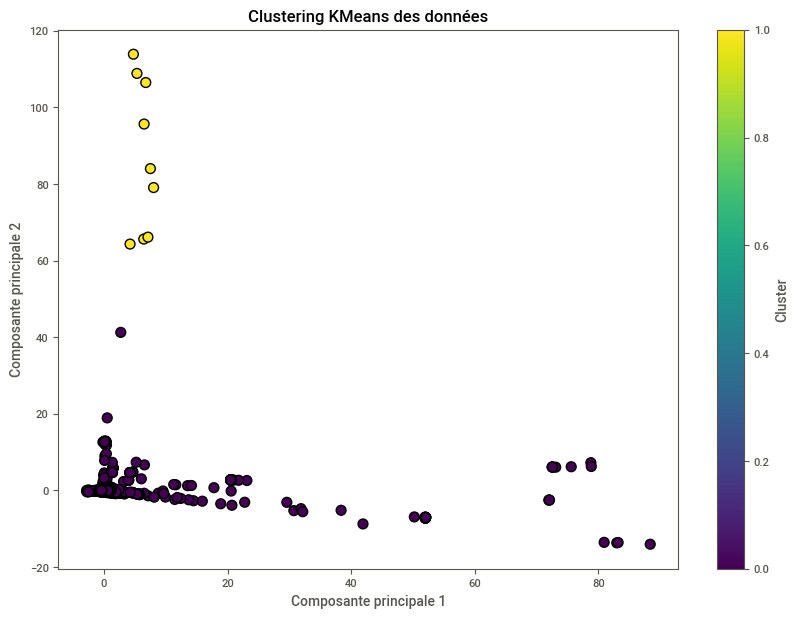

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardisation des données
X = df.drop(["Name", "Malware"], axis=1).to_numpy()  # Ensure X is defined
y = df["Malware"]  # Ensure y is defined
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Analyse en composantes principales (ACP)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Affichage des résultats de l'ACP
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('ACP des données')
plt.colorbar(label='Malware')
plt.show()

# Clustering avec KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Affichage des résultats du clustering
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Clustering KMeans des données')
plt.colorbar(label='Cluster')
plt.show()

In [8]:
y = df["Malware"]
X = df.drop(["Name", "Malware"], axis=1).to_numpy()

In [9]:
X

array([[2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 7.78240e+04,
        7.37280e+04, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 2.94912e+05,
        0.00000e+00, 3.46112e+05],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 4.09600e+04,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.31170e+04, 0.00000e+00, 0.00000e+00, ..., 6.14400e+04,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 1.02400e+05,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 5.57056e+05,
        0.00000e+00, 0.00000e+00]])

In [10]:
y

0        1
1        1
2        1
3        1
4        1
        ..
19606    0
19607    0
19608    0
19609    0
19610    0
Name: Malware, Length: 19611, dtype: int64

In [11]:
y.value_counts()

Malware
1    14599
0     5012
Name: count, dtype: int64

In [12]:
14590/len(X)*100

74.39702207944521

On peut remarquer que les classes ne sont pas très équilibrées !

Un classifieur naïf qui prédirait toujours 1 (non malveillant) ferait 74.39 % de bonnes réponses. On va voir si on peut faire mieux !

# Modélisation

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

import pandas as pd
import numpy as np # type: ignore
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, mean_squared_error
from xgboost import XGBClassifier
import shap
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense #type: ignore
import tensorflow as tf
from scipy.stats import uniform


2024-09-29 15:06:38.687131: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-29 15:06:38.687610: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-29 15:06:38.689420: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-29 15:06:38.693451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 15:06:38.700794: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

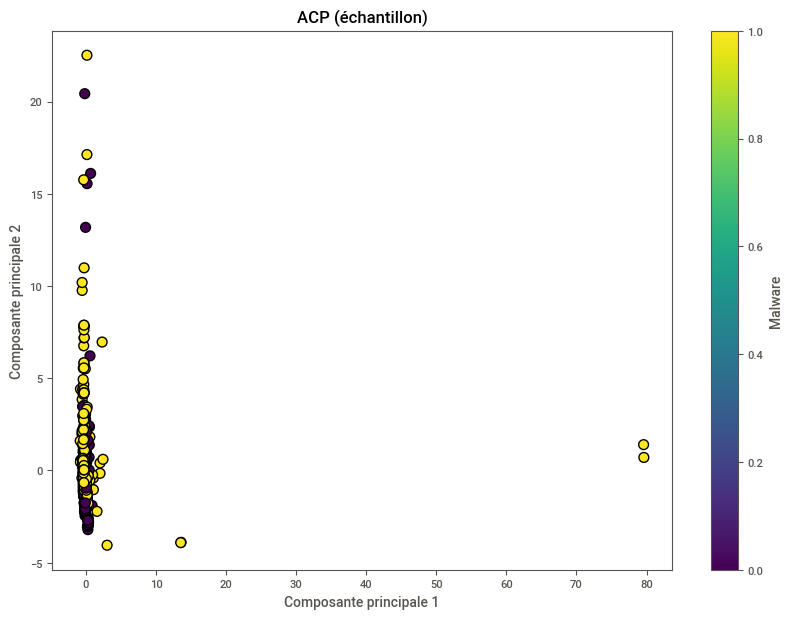

Variance expliquée par chaque composante principale :
Composante principale 1: 0.19
Composante principale 2: 0.07

Tableau des composantes principales :


,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
Composante principale 1,0.0,0.270814,0.270893,0.270894,0.270889,0.270855,-0.081640,-1.694066e-21,0.271024,0.022210,...,0.011996,0.0,-0.007181,-0.015072,-0.001308,-0.000568,0.001914,-0.001569,0.270898,0.025984
Composante principale 2,-0.0,0.006471,0.009956,0.010009,0.009973,0.010636,-0.030795,-0.000000e+00,0.008333,-0.037987,...,0.126320,-0.0,0.060656,0.139604,0.014920,0.028233,0.339641,0.400352,0.010923,0.145692


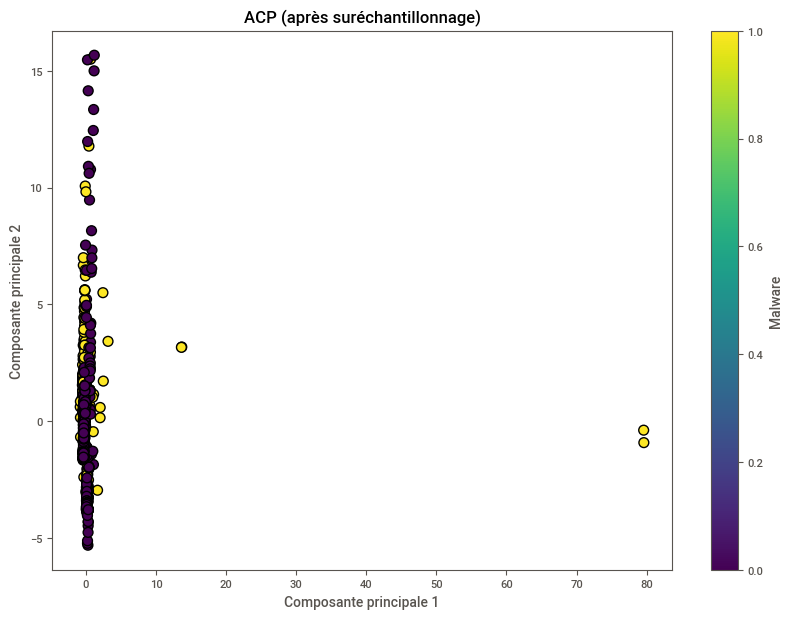

Variance expliquée par chaque composante principale (après suréchantillonnage) :
Composante principale 1: 0.15
Composante principale 2: 0.09

Tableau des composantes principales (après suréchantillonnage) :


,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
Composante principale 1,-0.0,0.269709,0.270067,0.270072,0.270059,0.270044,-0.092796,8.131516e-20,0.269859,0.022585,...,0.014121,-0.0,-0.008823,-0.015787,-0.002618,-0.000182,0.005683,0.003731,0.270092,0.031412
Composante principale 2,-0.0,-0.008863,-0.003660,-0.003570,-0.003691,-0.003054,-0.148108,2.220446e-16,-0.007739,0.018522,...,0.056427,-0.0,-0.024707,0.007241,0.002555,0.024029,0.221572,0.256404,-0.003122,0.179137


In [14]:
from imblearn.over_sampling import SMOTE


# Charger les données
df = pd.read_csv('file_pe_headers.csv')

# Échantillonner les données pour ACP et clustering (accélérer le processus)
sample_size = 1000 if len(df) > 1000 else len(df)
df_sample = df.sample(sample_size, random_state=42)

X = df_sample.drop(["Name", "Malware"], axis=1).to_numpy()
y = df_sample["Malware"]

# Prétraitement des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduction de dimensions avec ACP (avec échantillon)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('ACP (échantillon)')
plt.colorbar(label='Malware')
plt.show()

# Description des résultats de l'ACP
explained_variance = pca.explained_variance_ratio_
components = pca.components_

# Création d'un DataFrame pour afficher les résultats
pca_df = pd.DataFrame(data=components, columns=df_sample.drop(["Name", "Malware"], axis=1).columns)
pca_df.index = [f'Composante principale {i+1}' for i in range(len(components))]

# Affichage du tableau explicatif des ACP
print("Variance expliquée par chaque composante principale :")
for i, var in enumerate(explained_variance):
    print(f"Composante principale {i+1}: {var:.2f}")

print("\nTableau des composantes principales :")
display(pca_df)

# Amélioration : Utilisation de la technique de suréchantillonnage SMOTE pour équilibrer les classes


# Application de SMOTE pour générer des échantillons synthétiques
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Réduction de dimensions avec ACP (après suréchantillonnage)
X_pca_resampled = pca.fit_transform(X_resampled)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca_resampled[:, 0], X_pca_resampled[:, 1], c=y_resampled, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('ACP (après suréchantillonnage)')
plt.colorbar(label='Malware')
plt.show()

# Description des résultats de l'ACP après suréchantillonnage
explained_variance_resampled = pca.explained_variance_ratio_
components_resampled = pca.components_

# Création d'un DataFrame pour afficher les résultats après suréchantillonnage
pca_df_resampled = pd.DataFrame(data=components_resampled, columns=df_sample.drop(["Name", "Malware"], axis=1).columns)
pca_df_resampled.index = [f'Composante principale {i+1}' for i in range(len(components_resampled))]

# Affichage du tableau explicatif des ACP après suréchantillonnage
print("Variance expliquée par chaque composante principale (après suréchantillonnage) :")
for i, var in enumerate(explained_variance_resampled):
    print(f"Composante principale {i+1}: {var:.2f}")

print("\nTableau des composantes principales (après suréchantillonnage) :")
display(pca_df_resampled)


## XGBoost

In [15]:
from xgboost import XGBClassifier
import xgboost

XGB_model_instance = XGBClassifier()
XGB_model_instance.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [16]:
y_test_pred = XGB_model_instance.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score # type: ignore

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: %.2f%%" % (accuracy * 100))

Accuracy: 99.46%


In [18]:
import shap # type: ignore

In [20]:

# Modèle 2 : XGBoost avec SHAP
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Eviter les avertissements inutiles
XGB_model.fit(X_train, y_train)
y_test_pred = XGB_model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy XGBoost: {accuracy * 100:.2f}%")

# Importance des features avec SHAP (accélérer en ne prenant que des échantillons si trop lent)
explainer = shap.Explainer(XGB_model, X_test[:100])  # Accélération en limitant les échantillons
shap_values = explainer(X_test[:100])

shap.summary_plot(shap_values, X_test[:100])  # Plot d'importance des features

/home/max/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:07:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy XGBoost: 99.46%


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
shap.plots.beeswarm(shap_values)

Explorer de la même manière la librairie LIME

# Comparons à un réseau de neurones

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore

In [22]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/max/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1727615507.715535    1695 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-29 15:11:47.715779: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=150, batch_size=128)

Epoch 1/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 940us/step - accuracy: 0.7606 - loss: 532114496.0000
Epoch 2/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8183 - loss: 16754938.0000
Epoch 3/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.8023 - loss: 179394080.0000
Epoch 4/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.8414 - loss: 60485896.0000
Epoch 5/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.8592 - loss: 65500984.0000
Epoch 6/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8497 - loss: 40176008.0000
Epoch 7/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.8114 - loss: 40046780.0000
Epoch 8/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8300 - loss: 55507724.0000
Epoch 9/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8792 - loss: 23064572.0000
Epoch 10/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8532 - loss: 18222732.0000
Epoch 11/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
model.evaluate(X_test, y_test)

## Rapport détaillé

### Introduction
Nous avons un jeu de données tabulaire contenant des logiciels, dont certains sont des malwares. L'objectif est de mener une analyse exploratoire des données, puis de créer et comparer plusieurs modèles de classification pour détecter les malwares.

### Analyse Exploratoire des Données (EDA)
1. **Chargement des données**:
    - Les données sont chargées à partir d'un fichier CSV nommé `file_pe_headers.csv`.

2. **Visualisation des données**:
    - Utilisation de `summarytools` pour obtenir un résumé des données.
    - Utilisation de `sweetviz` pour générer un rapport HTML interactif des données.

3. **Analyse en Composantes Principales (ACP)**:
    - Les données sont standardisées à l'aide de `StandardScaler`.
    - Une ACP est réalisée pour réduire les dimensions à 2 composantes principales.
    - Les résultats de l'ACP sont visualisés à l'aide de graphiques de dispersion.

4. **Clustering avec KMeans**:
    - Un clustering KMeans est effectué sur les données standardisées.
    - Les résultats du clustering sont visualisés sur les composantes principales obtenues par l'ACP.

5. **Suréchantillonnage avec SMOTE**:
    - Utilisation de la technique de suréchantillonnage SMOTE pour équilibrer les classes.
    - Une nouvelle ACP est réalisée sur les données suréchantillonnées.
    - Les résultats de l'ACP après suréchantillonnage sont visualisés.
  
6.  **Analyse des ACP**
    - Les composantes principales sont analysées pour comprendre les caractéristiques importantes.
    - Les graphiques de dispersion sont utilisés pour visualiser les classes après ACP.
    - La plupart des données se regroupent au centre du graphique, près du point de départ des axes. Cette zone est principalement occupée par les malwares (points jaunes). Les quelques logiciels bénins (points violets) présents dans cette zone suggèrent que les deux types de logiciels partagent des caractéristiques communes. Les échantillons situés loin du centre forment des groupes plus isolés, ce qui pourrait indiquer des comportements ou des caractéristiques spécifiques à ces logiciels.

### Modélisation
1. **Préparation des données**:
    - Les données sont divisées en ensembles d'entraînement et de test à l'aide de `train_test_split`.

2. **Modèle XGBoost**:
    - Un modèle `XGBClassifier` est entraîné sur les données d'entraînement.
    - Les prédictions sont effectuées sur les données de test.
    - L'exactitude du modèle est calculée et affichée.

3. **Interprétation avec SHAP**:
    - Les valeurs SHAP sont calculées pour interpréter les prédictions du modèle XGBoost.
    - Les graphiques SHAP sont générés pour visualiser l'importance des caractéristiques.

4. **Modèle de Régression Lasso**:
    - Un modèle de régression Lasso est entraîné avec `GridSearchCV` pour optimiser les hyperparamètres.

5. **Réseau de Neurones Fully-Connected**:
    - Un réseau de neurones est construit et entraîné à l'aide de `TensorFlow` et `Keras`.
    - Le modèle est évalué sur les données de test.

### Conclusion
Nous avons mené une analyse exploratoire complète des données, suivi de la création et de l'évaluation de plusieurs modèles de classification. Les résultats des différents modèles seront comparés pour déterminer lequel est le plus performant pour la détection des malwares.


### Modélisation
1. **Préparation des données**:
    - Les données sont divisées en ensembles d'entraînement et de test à l'aide de `train_test_split`.

2. **Modèle XGBoost**:
    - Un modèle `XGBClassifier` est entraîné sur les données d'entraînement.
    - Les prédictions sont effectuées sur les données de test.
    - L'exactitude du modèle est calculée et affichée.

3. **Interprétation avec SHAP**:
    - Les valeurs SHAP sont calculées pour interpréter les prédictions du modèle XGBoost.
    - Les graphiques SHAP sont générés pour visualiser l'importance des caractéristiques.

4. **Modèle de Régression Lasso**:
    - Un modèle de régression Lasso est entraîné avec `GridSearchCV` pour optimiser les hyperparamètres.

5. **Réseau de Neurones Fully-Connected**:
    - Un réseau de neurones est construit et entraîné à l'aide de `TensorFlow` et `Keras`.
    - Le modèle est évalué sur les données de test.

### Conclusion
Nous avons mené une analyse exploratoire complète des données, suivi de la création et de l'évaluation de plusieurs modèles de classification. Les résultats des différents modèles seront comparés pour déterminer lequel est le plus performant pour la détection des malwares.
